In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def generateSample(a = 1, b = 0, SampleSize = 100) :
  Noise = np.random.normal(size = SampleSize)
  X = np.linspace(start = 0, stop = 10, num = SampleSize)
  Sample = a * X + b + Noise
  return X, Sample

#each coordinate of gradient has been found manually
def grad(t, X, Y) :
  temp = np.array([0., 0.])
  m = X.shape[0]
  temp[0] = np.sum(t[0] + t[1] * X - Y) / m
  temp[1] = np.sum(X) * temp[0] / m

  return temp

def linearRegression(X, Y) :
  rate = 0.01 #learning rate
  eps = 0.001 #sufficient error
  curr = np.array([1., 1.])
  prev = np.zeros(2)

  while ((np.abs((curr - prev)[0]) > eps) or (np.abs((curr - prev)[1]) > eps)) :
    prev = np.copy(curr)
    curr = np.copy(prev - rate * grad(prev, X, Y))

  return curr

[1.07592636 1.37963181]


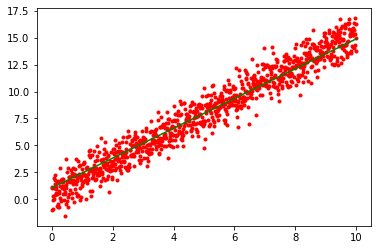

In [34]:
size = 1000

X, Y = generateSample(1.5, 0.5, size)
approx = linearRegression(X, Y)
print(approx)

plt.scatter(X, Y, marker = '.', color = 'r')
plt.plot()
plt.plot(X, approx[1] * X + approx[0], color = 'g')

In [50]:
def generateSampleClsf(center, cov, numOfSamples) :
  return np.random.multivariate_normal(center, cov, numOfSamples)
 
def sigmoid(x) :
  return 1 / (1 + np.exp(-x))

def gradL (t, X0, X1) :
  m = X0.shape[0] + X1.shape[0]
  r = np.array([0., 0., 0.])
  sigm_X0 = np.array([sigmoid(t[0] + t[1] * x[0] + t[2] * x[1]) for x in X0])
  sigm_X1 = np.array([sigmoid(t[0] + t[1] * x[0] + t[2] * x[1]) for x in X1])

  r[0] = (np.sum(sigm_X0) + np.sum(sigm_X1 - 1)) / m
  r[1] = (np.sum(X0[:, 0]) + np.sum(X1[:, 0])) * r[0]
  r[2] = (np.sum(X0[:, 1]) + np.sum(X1[:, 1])) * r[0]

  return r

def logisticRegression(X0, X1) :
  rate = 0.05 #learning rate
  eps = 0.005 #sufficient error
  curr = np.array([1., 1., 1.])
  prev = np.zeros(3)

  #while ((np.abs((curr - prev)[0]) > eps) or (np.abs((curr - prev)[1]) > eps)) :
  for i in range(200) :
    prev = np.copy(curr)
    curr = np.copy(prev - rate * gradL(prev, X0, X1))
    #print(curr)

  return curr

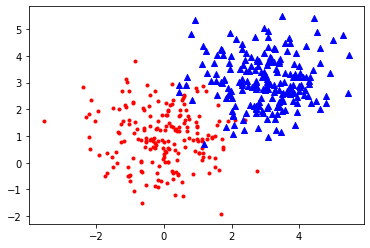

In [8]:
num0 = 200
num1 = 200
center0 = np.array([0, 1])
center1 = np.array([3, 3])
cov0 = np.array([[1, 0], [0, 1]])
cov1 = np.array([[1, 0], [0, 1]])

X0 = generateSampleClsf(center0, cov0, num0)
X1 = generateSampleClsf(center1, cov1, num1)

plt.scatter(X0[:, 0], X0[:, 1], color = 'r', marker = '.')
plt.scatter(X1[:, 0], X1[:, 1], color = 'b', marker = '^')

[-0.99814499  0.42616025  0.26950989]


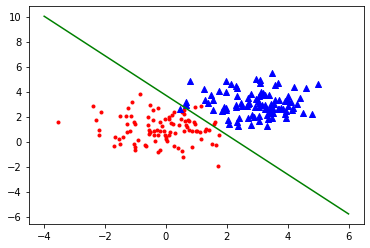

In [54]:
X0_learn = X0[: int(0.5 * num0)]
X1_learn = X1[: int(0.5 * num1)]
X0_test = X0[int(0.5 * num0) + 1 :]
X1_test = X1[int(0.5 * num1) + 1 :]

X = np.linspace(-4, 6, 100)

coef = logisticRegression(X0_learn, X1_learn)

coef[0] *= -1
print(coef)

plt.scatter(X0_test[:, 0], X0_test[:, 1], color = 'r', marker = '.')
plt.scatter(X1_test[:, 0], X1_test[:, 1], color = 'b', marker = '^')
plt.plot(X, -coef[0] / coef[2] + X * (-coef[1] / coef[2]), color = 'g')

In [60]:
#t: array of coefficients, X0 and X1 are arrays of 2d points
#labeled 0 and 1 respectively
def accuracy(t, X0, X1) :
  acc = 0
  m = X0.shape[0] + X1.shape[0]

  for x in X0 :
    tmp = t[0] + t[1] * x[0] + t[2] * x[1]
    if tmp < 0 :
      acc += 1
  
  for x in X1 :
    tmp = t[0] + t[1] * x[0] + t[2] * x[1]
    if tmp > 0 :
      acc += 1
  
  return acc / m

In [61]:
print(accuracy(coef, X0_test, X1_test))

198
95
193
99 99 0.9747474747474747
